# Microassignment 2 | Pesi Taototo

## What are amortized loans
Taken from [Wikipedia](https://en.wikipedia.org/wiki/Amortizing_loan)
>"An amortized loan is a loan where the principal of the loan is paid down over the life a loan (that is, amortized) according to an amortization schedule. Each payment to the lender will consist of a portion of interest and a portion of principal. Mortgage loans are typically amortizing loans. The calculations for an amortizing loan are those of an annuity using the time value of money formulas, and can be done using an amortization calculator."

## Monthly Payment Calculation
For calculating monthly payments, we will use the following formula:
$$mpayment=\frac{r(P)}{1-(1+r)^{-n}}$$

where $r$ represents monthly interest rate, $P$ is the cost of the car, and $n$ is the number of monthly payments.

## Remaining Loan Balance
We will be using the following formula:
$$Balance = P(1+r)^n - mpayment\frac{(1+r)^{n}-1}{r}$$

Note: We can compute this iteratively. For each month, compute the interest ($i = r\cdot P_{remaining}$) and subtract the interest from the monthly payment to get monthly principal paid ($P_{monthlypaid} = mpayment - i$). Subtract the accumulated monthly pricipal paid from the original principal $P$ to find the remaining balance.

In [596]:
from math import pow # for calculating (1+r)^n


loan_title = str(input("What the loan for? "))
original_principal_amount = float(input("Enter the principal loan amount: $"))
annual_interest = float(input("Enter the yearly interest as a percent: "))
years_of_loan = int(input("Enter the years of the loan: "))

principal_amount = original_principal_amount

# convert the percent to decimal
annual_interest = annual_interest / 100.0
monthly_interest = annual_interest / 12.0
# convert years to months
months_of_payment = years_of_loan * 12 # 12 months in a year

# How much we would pay per month
monthly_payment = (monthly_interest * principal_amount) / (1 - pow(1 + monthly_interest, -1 * months_of_payment))

total_loan_amount = monthly_payment * months_of_payment
total_interest_paid = total_loan_amount - principal_amount

print("Loan for: %s" %(loan_title))
print("Monthly payment: $%.2f" %(monthly_payment))
print("Total loan amount: $%.2f" %(total_loan_amount))
print("Total interest paid: $%.2f" %(total_interest_paid))

print("%s%10s%10s%10s%10s" %("Month", "Balance", "Principal", "Interest", "Payment"))


total_principal = 0
total_interest = 0

# Keep track of points needed to graph the principal paid, 
# interest, and remaining balance
principal_points = []
interest_points = []
remaining_points = []
for i in range(1,months_of_payment + 2):
    interest = monthly_interest * principal_amount
    monthly_principal_paid = monthly_payment - interest
    
    # (i-1) to account for range(1,months_of_payment)
    if((i-1) % 12 == 0):
        # At end of every year, record the total to form a list
        principal_points.append(total_principal)
        interest_points.append(total_interest+total_principal)
        remaining_points.append(principal_amount)
        
    total_principal += monthly_principal_paid
    total_interest += interest
    
    print("%.5s     $%.2f  $%.2f  $%.2f  $%.2f" %(i, principal_amount, monthly_principal_paid, interest, monthly_payment))
    principal_amount -= monthly_principal_paid


What the loan for? BMW i8
Enter the principal loan amount: $141695
Enter the yearly interest as a percent: 4.00
Enter the years of the loan: 5
Loan for: BMW i8
Monthly payment: $2609.53
Total loan amount: $156571.75
Total interest paid: $14876.75
Month   Balance Principal  Interest   Payment
1     $141695.00  $2137.21  $472.32  $2609.53
2     $139557.79  $2144.34  $465.19  $2609.53
3     $137413.45  $2151.48  $458.04  $2609.53
4     $135261.97  $2158.66  $450.87  $2609.53
5     $133103.31  $2165.85  $443.68  $2609.53
6     $130937.46  $2173.07  $436.46  $2609.53
7     $128764.39  $2180.31  $429.21  $2609.53
8     $126584.07  $2187.58  $421.95  $2609.53
9     $124396.49  $2194.87  $414.65  $2609.53
10     $122201.62  $2202.19  $407.34  $2609.53
11     $119999.43  $2209.53  $400.00  $2609.53
12     $117789.90  $2216.90  $392.63  $2609.53
13     $115573.00  $2224.29  $385.24  $2609.53
14     $113348.71  $2231.70  $377.83  $2609.53
15     $111117.01  $2239.14  $370.39  $2609.53
16     $108

#### Loan Graph

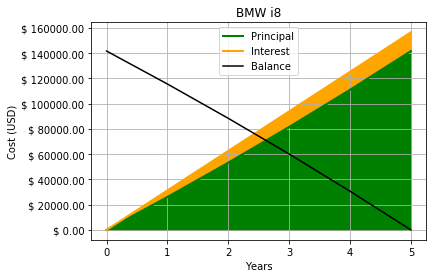

In [597]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# --------------------------------------- #
''' 
    The following solution to adding '$' to tick marks comes from
    http://omz-software.com/pythonista/matplotlib/users/artists.html.
    In no way is it an original solution.
    
    In fact, I haven't read the documentation enough to know why it works, 
    but at least it makes the y-axis look pretty
'''
fig = plt.figure()
axes = fig.add_subplot(111)

formatter = ticker.FormatStrFormatter("$ %.2f")
axes.yaxis.set_major_formatter(formatter)
# --------------------------------------- #    


# Set the x-axis based on years and principal+interest, and scale it larger by 5%
plt.xlim(0 - (.05) * years_of_loan, years_of_loan + (.05) * years_of_loan)
# Generate y-axis using principal+interest (total amount), and dilate it by 5%
plt.ylim(0 - (.05) * total_loan_amount, total_loan_amount + (.05) * total_loan_amount)
plt.grid(True)

plt.title(loan_title)
plt.xlabel("Years")
plt.ylabel("Cost (USD)")

#plt.xticks(np.arange(0, 4, 1))

# Plot the interest and principal lines
plt.plot(principal_points, linewidth=2, color="green", label="Principal")
plt.plot(interest_points, linewidth=2, color="orange", label="Interest")

plt.plot(remaining_points, color="black", label="Balance")


'''
Couldn't figured out how to use fill_between() with an array until
I stumbled across an answer by StackOverflow user Trond Kristiansen
https://stackoverflow.com/a/20166069
'''
x1 = np.arange(len(interest_points))
plt.fill_between(x1, 0, interest_points, color="orange")

x2 = np.arange(len(principal_points))
plt.fill_between(x2, 0, principal_points, color="green")


plt.legend(loc="upper center")
plt.show()